In [3]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# constants
timesteps = 60
trials = 150
learning_rate = 0.4
discount_factor = 0.99

# initialization
weight = np.zeros([1, timesteps])
# weight[0] = 0.5
value = np.zeros([timesteps, trials])
reward = np.zeros([1,timesteps])
reward[:,58] = 1.0
delta = np.zeros([timesteps, trials])

time_light = 9
x = np.zeros([timesteps, timesteps])
features = timesteps - time_light
for i in range(features):
    x[i, time_light] = 1.0
    time_light += 1
    
       

In [29]:
for trial in range(trials):

    # fill out all values 
    value[:, trial] = np.dot(weight, x)

    # fill out delta
    for timestep in range(timesteps - 1):
        if timestep == timesteps - 1:
            delta[timestep, trial] = reward[:,timestep] + 0 - value[timestep, trial]
        else:
            delta[timestep, trial] = reward[:,timestep] + discount_factor*value[timestep + 1, trial] - value[timestep, trial]
            # FIRST WAY: update weight after timestep
#         weight = weight + learning_rate*delta[timestep, trial]*x[:, timestep].T
    
    # SECOND WAY: update weight after trial
    # in CSC they are equivalent
    delta_weight = learning_rate*np.dot(delta[:, trial], x.T)
    weight += delta_weight
    
     



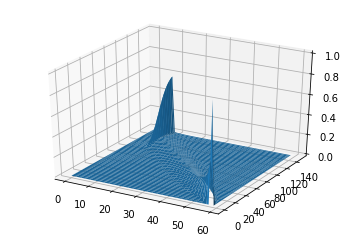

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(np.tile(range(trials),(timesteps,1)), np.tile(range(trials),(timesteps,1)) , delta)
# ax.plot_surface(np.tile(range(timesteps),(trials,1)).transpose(), np.tile(range(trials),(timesteps,1)), delta)
ax.plot_surface(np.tile(range(timesteps),(trials,1)), np.tile(range(trials),(timesteps,1)).transpose(), delta.transpose())
plt.show()

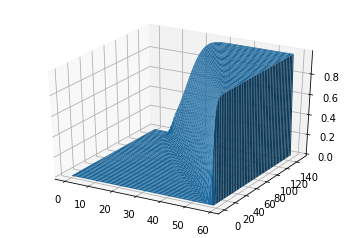

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(np.tile(range(trials),(timesteps,1)), np.tile(range(trials),(timesteps,1)) , delta)
# ax.plot_surface(np.tile(range(timesteps),(trials,1)).transpose(), np.tile(range(trials),(timesteps,1)), delta)
ax.plot_surface(np.tile(range(timesteps),(trials,1)), np.tile(range(trials),(timesteps,1)).transpose(), value.transpose())
plt.show()